# Vince

Peace_Treaty_Accords	Technological_Advancements	Ammonia_Concentration	Precious_Metal_Trade_Tons	Food_Production_Tons	Trade_Agreements_Signed	Last_Contact_Days	Discovery_Date	Mineral_Extraction_Tons	Galactic_Visits

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import gamma
from scipy.stats import poisson
from scipy.stats import norm
import scipy.stats as stats
import datetime as dt
from scipy.stats import lognorm

In [2]:
title = 'alien_galaxy.csv'
df = pd.read_csv(title)
df.head()

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Galactic_Trade_Revenue,Alien_Civilization_Level,Interstellar_Contact_Cost,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,78285.0,10.0,Married,98.55,3118.0,NaN,11.0,Master,3.0,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,62772.0,10.0,Single,66.36,3099.0,0.0,11.0,Master,3.0,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,69016.0,5.0,Married,25.23,3100.0,0.0,11.0,Graduation,3.0,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,43795.0,NaN,Together,44.59,3098.0,1.0,11.0,Master,3.0,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,57957.0,8.0,Together,90.67,3089.0,0.0,11.0,Graduation,3.0,4.0


In [3]:
#Make a copy of the dataframe, as such we can always go back easily
df_in_progress = df.drop(['Planet_ID', 'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost'], axis=1)
df_in_progress

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,0.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,0.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,0.0,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,0.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,0.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,0.0,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,27-11-2029,NaN,5.0,...,0.0,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,28-09-2029,61.0,4.0,...,NaN,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,01-10-2029,197.0,4.0,...,0.0,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0


In [4]:
# Convert discovery_date to timestamp format and afterwards we standardize it, this way we can plot it easily.
df_in_progress['Discovery_Date'] = pd.to_datetime(df_in_progress['Discovery_Date'], errors='coerce')

df_in_progress['Discovery_Date'] = df_in_progress['Discovery_Date'].apply(
    lambda x: int(x.timestamp()) if pd.notnull(x) else None
)
df_in_progress['Discovery_Date'] = (df_in_progress['Discovery_Date']-np.mean(df_in_progress['Discovery_Date'])) / np.std(df_in_progress['Discovery_Date'])

df_in_progress

/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_39705/1486550972.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_in_progress['Discovery_Date'] = pd.to_datetime(df_in_progress['Discovery_Date'], errors='coerce')


,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,1.018263,391.0,3.0,...,0.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,-0.831594,NaN,2.0,...,0.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,-0.371167,363.0,5.0,...,0.0,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,0.847131,53.0,7.0,...,0.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,-0.053350,177.0,3.0,...,0.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,0.0,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,0.647477,NaN,5.0,...,0.0,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,0.403003,61.0,4.0,...,NaN,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,-0.660461,197.0,4.0,...,0.0,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0


In [5]:
# Function to quickly plot the demanded variables

def perform_graphical_analysis(plots_per_row, columns):

    for i in range(0, len(columns), plots_per_row):
        remaining_columns = len(columns) - i
        
        if remaining_columns == 2:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        elif remaining_columns == 1:
            fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        else:
            fig, axes = plt.subplots(1, plots_per_row, figsize=(18, 6))
        
        for j, column in enumerate(columns[i:i+plots_per_row]):
            if remaining_columns == 1:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_in_progress[column], ax=ax)
                    ax.set_title(f'Count plot of {column} (binary)')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Count')
                else:
                    sns.histplot(df_in_progress[column], kde=True, ax=ax)
                    ax.set_title(f'Distribution of {column}')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Frequency')
            else:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_in_progress[column], ax=axes[j])
                    axes[j].set_title(f'Count plot of {column} (binary)')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Count')
                else:
                    sns.histplot(df_in_progress[column], kde=True, ax=axes[j])
                    axes[j].set_title(f'Distribution of {column}')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

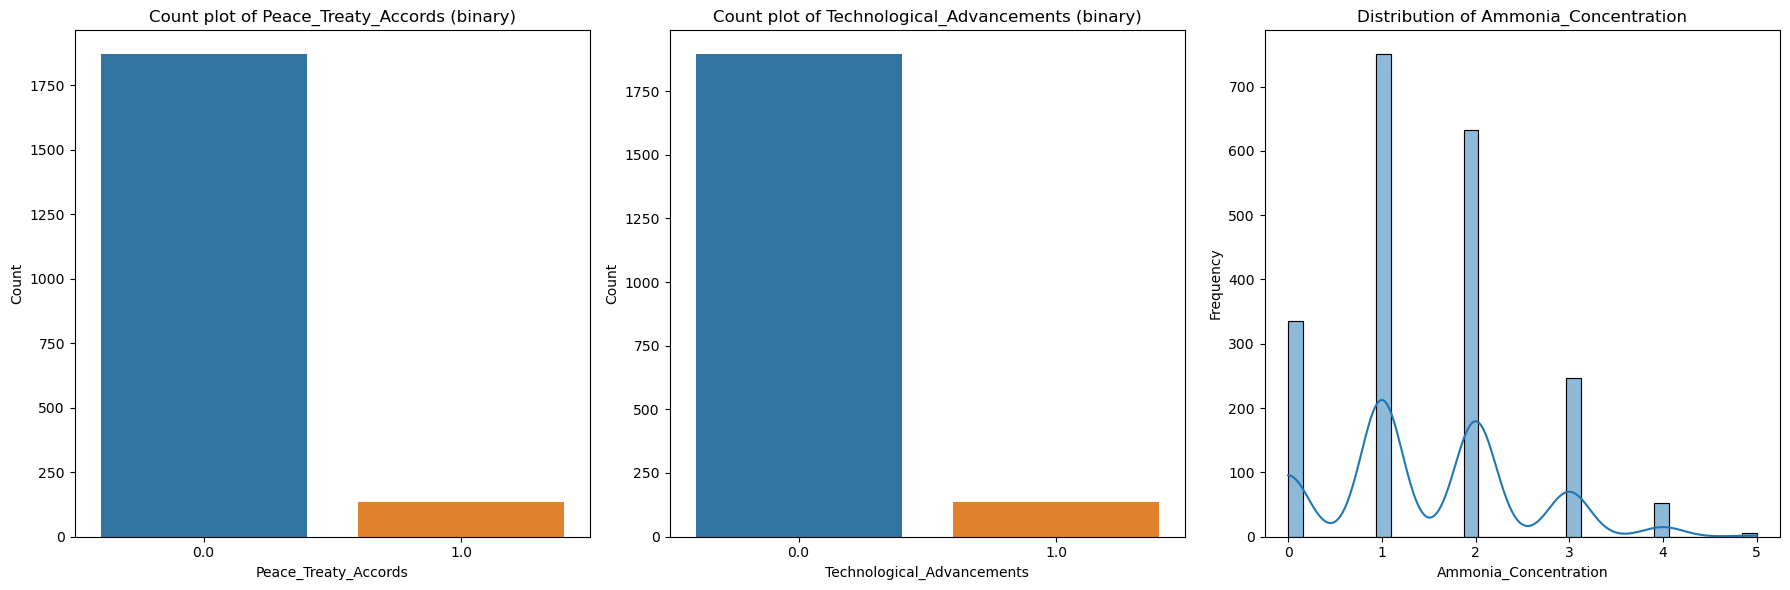

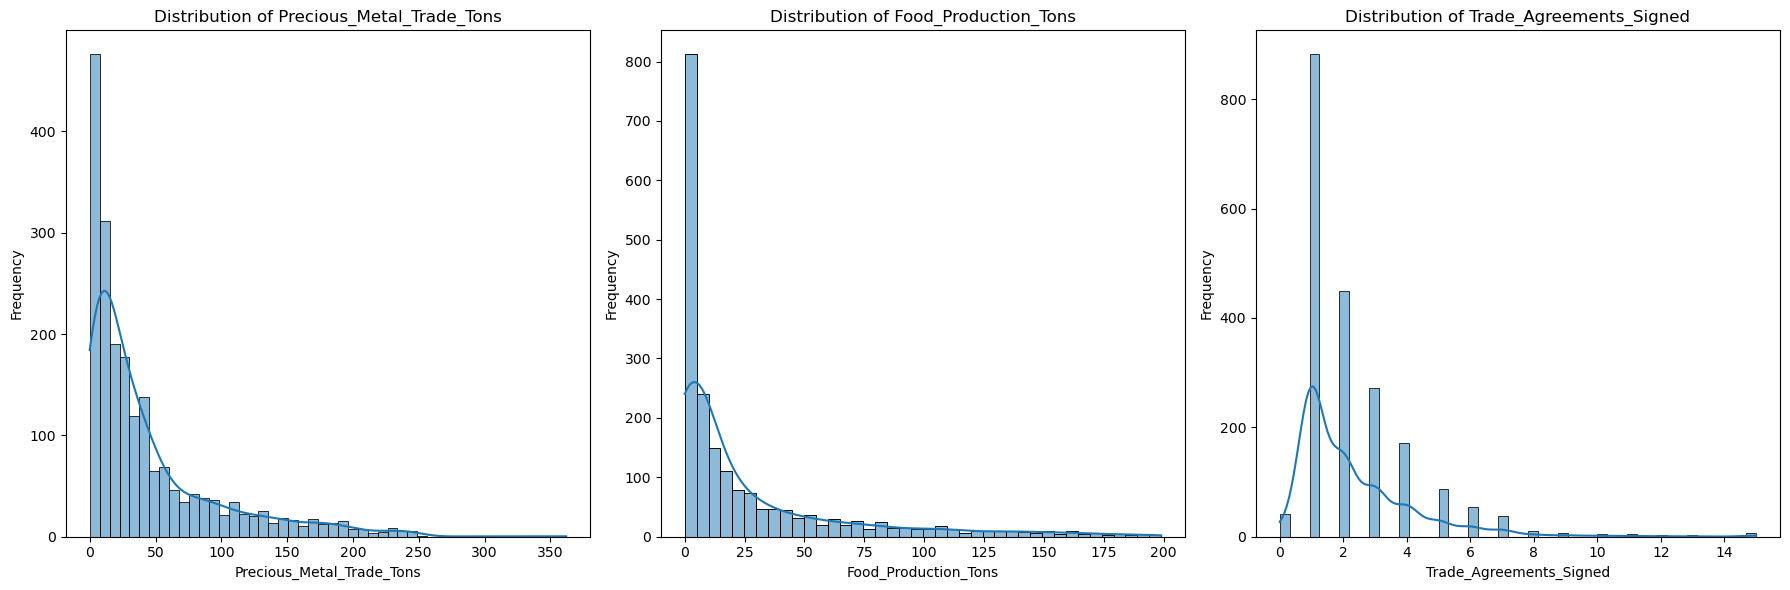

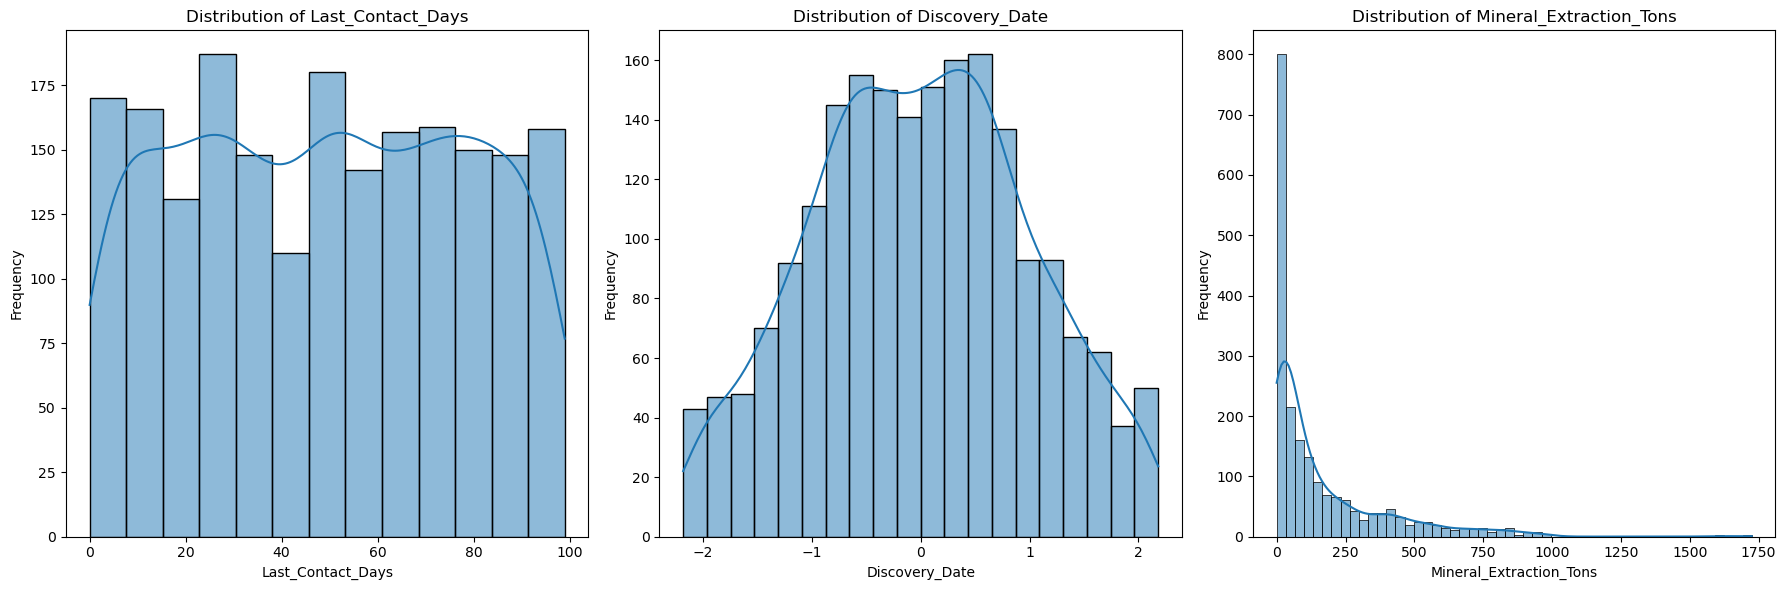

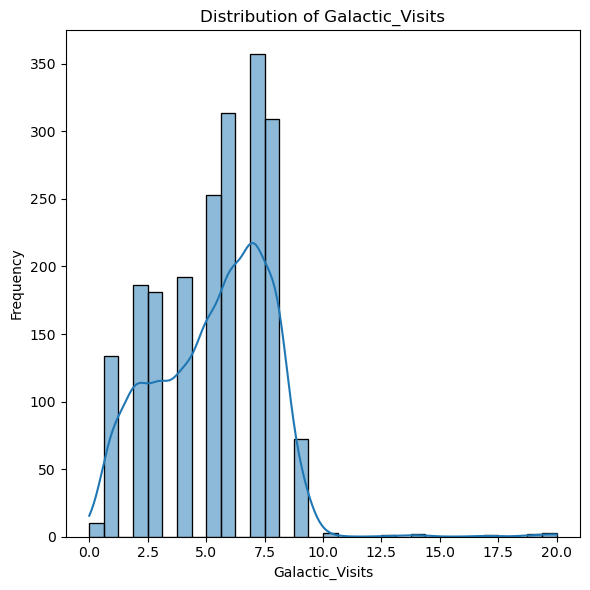

In [6]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 3
columns = ['Peace_Treaty_Accords', 'Technological_Advancements',
       'Ammonia_Concentration', 'Precious_Metal_Trade_Tons',
       'Food_Production_Tons', 'Trade_Agreements_Signed', 'Last_Contact_Days',
       'Discovery_Date', 'Mineral_Extraction_Tons', 'Galactic_Visits',
       ]
perform_graphical_analysis(plots_per_row, columns)

/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_39705/3321832379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_in_progress.corr()


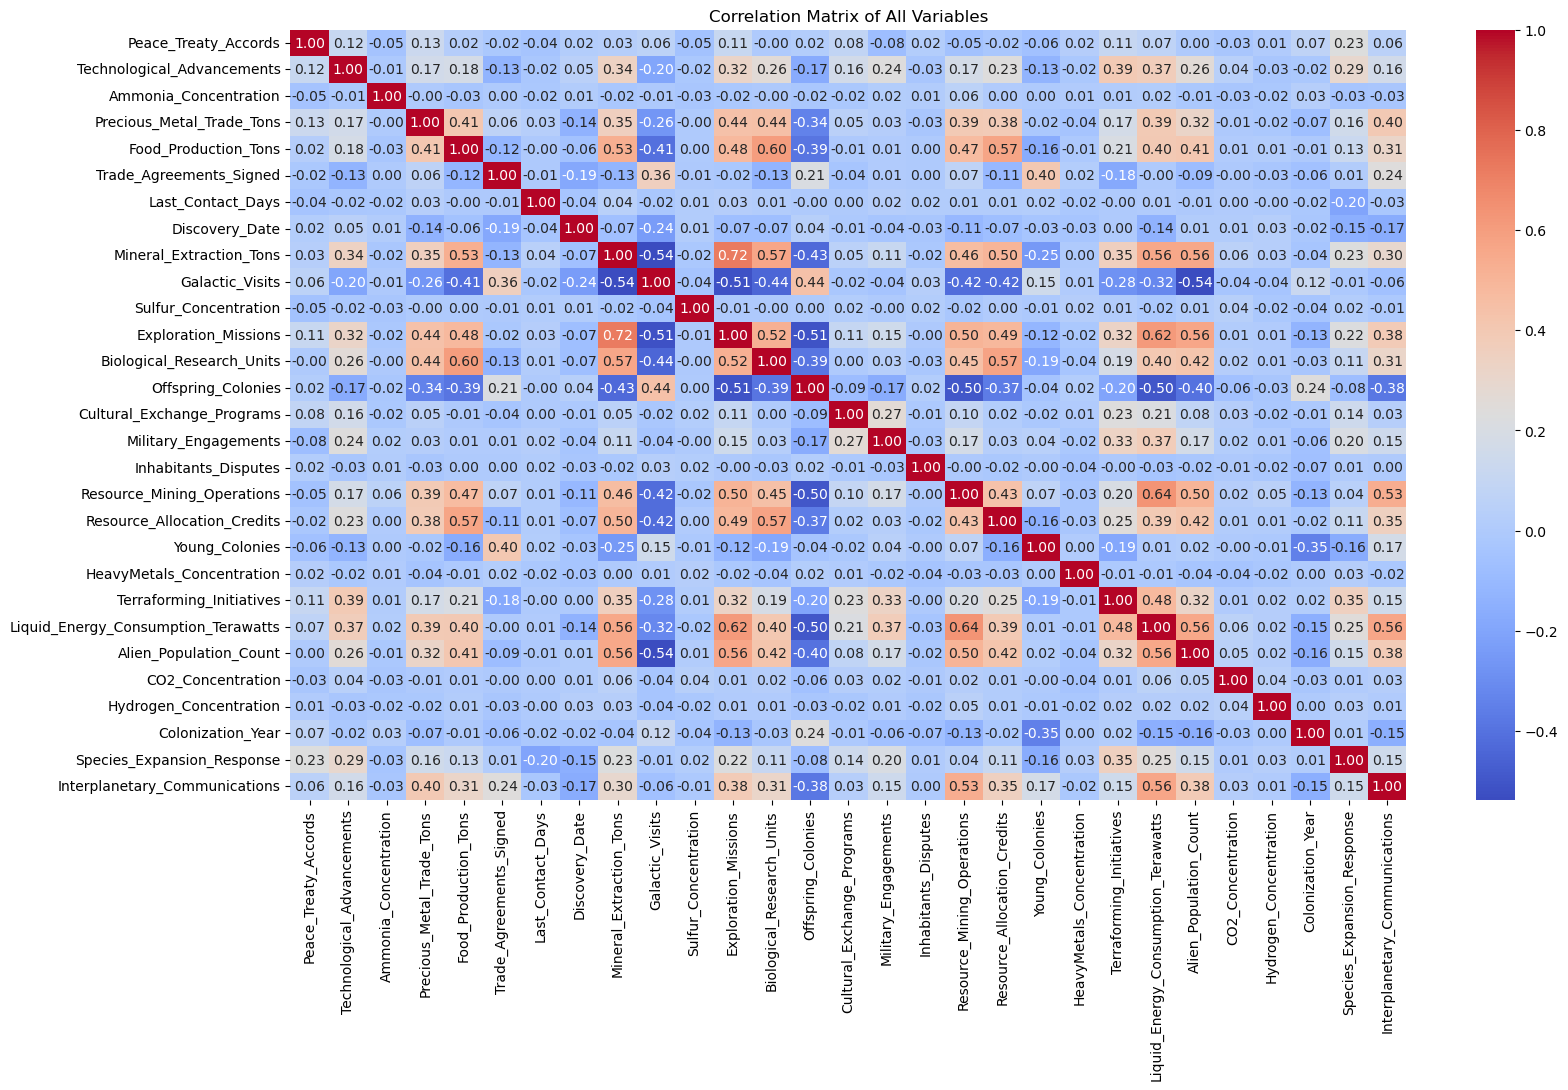

In [7]:
correlation_matrix = df_in_progress.corr()

# Plot the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of All Variables")
plt.show()

In [8]:
#Function to calculate and save the biggest correlations. Since we don't pay attention to correlations when filling up the missing values we can see here how big the difference is.
def high_correlations(df, threshold=0.5):
    correlation_matrix = df.corr()

    result = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                result.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': abs(corr_value)
                })

    correlation_df = pd.DataFrame(result)
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
    correlation_df = correlation_df.reset_index(drop=True)

    return correlation_df

In [9]:
# call the correlation caluculation function
correlation_df = high_correlations(df_in_progress)
correlation_df

/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_39705/1124174870.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Variable 1,Variable 2,Correlation
0,Mineral_Extraction_Tons,Exploration_Missions,0.723468
1,Resource_Mining_Operations,Liquid_Energy_Consumption_Terawatts,0.639129
2,Exploration_Missions,Liquid_Energy_Consumption_Terawatts,0.615159
3,Food_Production_Tons,Biological_Research_Units,0.599803
4,Biological_Research_Units,Resource_Allocation_Credits,0.574609
5,Food_Production_Tons,Resource_Allocation_Credits,0.569224
6,Mineral_Extraction_Tons,Biological_Research_Units,0.567399
7,Exploration_Missions,Alien_Population_Count,0.564253
8,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.562423
9,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.558047


In [10]:
# Functions of the distributions to complete the missing values

# Bernoulli distribution
def impute_with_bernoulli(df, column_name):
    data_column = df[column_name].copy()
    p_success = data_column.mean()
    
    nan_indices = data_column.isna()
    samples = bernoulli(p_success).rvs(size=nan_indices.sum())
    
    data_column.loc[nan_indices] = samples
    
    df[column_name] = data_column

    return df

# Multinomial distribution
def impute_with_multinominal(df,column_name):
    column_data = df[column_name]
    non_nan_data = column_data.dropna()
    
    value_counts = non_nan_data.value_counts(normalize=True).sort_index()
    possible_values = np.arange(int(non_nan_data.min()), int(non_nan_data.max()) + 1)
    probs = [value_counts.get(value, 0) for value in possible_values]
    
    nan_indices = column_data[column_data.isna()].index
    sampled_values = np.random.choice(possible_values, size=len(nan_indices), p=probs)
    
    df.loc[nan_indices, column_name] = sampled_values

    return df

# Gamma distribution
def impute_with_gamma(df, column_name):
    observed_data = df[column_name].dropna()
    shape, loc, scale = gamma.fit(observed_data)

    num_missing = df[column_name].isna().sum()
    imputed_values = gamma.rvs(shape, loc=loc, scale=scale, size=num_missing)
    
    imputed_values_rounded = [int(val) for val in imputed_values]

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Uniform distribution
def impute_with_uniform(df, column_name):
    min_val = min(df[column_name])
    max_val = max(df[column_name])
    num_missing = df[column_name].isna().sum()

    imputed_values = np.random.uniform(min_val, max_val, size=num_missing).astype(int)

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values

    return df

# Normal distribution
def impute_with_normal(df, column_name):
    observed_data = df[column_name].dropna()
    loc, scale = norm.fit(observed_data)

    num_missing = df[column_name].isna().sum()
    imputed_values = norm.rvs(loc=loc, scale=scale, size=num_missing)
    
    imputed_values_rounded = [int(val) for val in imputed_values]

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Lognormal distribution
def impute_with_lognormal(df, column_name):
    # Get observed (non-missing) data
    observed_data = df[column_name].dropna()
    
    # Fit a lognormal distribution to the observed data
    shape, loc, scale = lognorm.fit(observed_data, floc=0)  # Fix loc=0 for typical lognormal fits
    
    # Generate imputed values for missing data
    num_missing = df[column_name].isna().sum()
    imputed_values = lognorm.rvs(shape, loc, scale, size=num_missing)
    
    # Round imputed values to integers if needed
    imputed_values_rounded = [int(val) for val in imputed_values]

    # Assign imputed values back to the DataFrame
    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

In [11]:
# Bernoulli distribution

columns_to_impute = ['Peace_Treaty_Accords', 'Technological_Advancements']
for x in columns_to_impute:
    df_in_progress = impute_with_bernoulli(df_in_progress, x)

df_in_progress.isna().sum()[:10]

Peace_Treaty_Accords            0
Technological_Advancements      0
Ammonia_Concentration         217
Precious_Metal_Trade_Tons     215
Food_Production_Tons          246
Trade_Agreements_Signed       207
Last_Contact_Days             234
Discovery_Date                226
Mineral_Extraction_Tons       208
Galactic_Visits               220
dtype: int64

In [12]:
# Multinomial distribution

columns_to_impute = ['Ammonia_Concentration', 'Trade_Agreements_Signed', 'Galactic_Visits']
for x in columns_to_impute:
    df_in_progress = impute_with_multinominal(df_in_progress, x)

print("DataFrame with NaNs filled in specified columns:")
df_in_progress.isna().sum()[:10]

DataFrame with NaNs filled in specified columns:


Peace_Treaty_Accords            0
Technological_Advancements      0
Ammonia_Concentration           0
Precious_Metal_Trade_Tons     215
Food_Production_Tons          246
Trade_Agreements_Signed         0
Last_Contact_Days             234
Discovery_Date                226
Mineral_Extraction_Tons       208
Galactic_Visits                 0
dtype: int64

We try to figure out which distributions match the variables. Therefore we perform a test developped by chat GPT. How to interprete the results?
1.	KS Statistic: This value represents the maximum absolute difference between the cumulative distribution function (CDF) of the data and the CDF of the theoretical distribution. A smaller KS statistic suggests a closer match between the data and the theoretical distribution.
2.	P-value: This value indicates the significance of the difference between the data and the theoretical distribution:
* A high p-value (typically above 0.05) suggests that we cannot reject the null hypothesis, meaning the data could plausibly follow the tested distribution.
* A low p-value (below 0.05) suggests a significant difference, meaning the data likely does not follow the tested distribution.

In [13]:
def retrieve_distribution(variable):
# Extract the data for the variable to analyze
    variable_distribution = df_in_progress[variable].dropna()

    # List of distributions to test
    dist_names = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'uniform', 'poisson', 'geom', 'binom']
    fit_results = {}

    for dist_name in dist_names:
        try:
            # Get the distribution
            dist = getattr(stats, dist_name)
            
            # Fit the distribution to the data
            if dist_name == 'binom':
                # For binomial, n is approximated as max value, p is fitted
                n = int(variable_distribution.max())
                p = variable_distribution.mean() / n
                params = (n, p)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            elif dist_name == 'poisson':
                # For Poisson, we use the mean as the lambda parameter
                lambda_param = variable_distribution.mean()
                params = (lambda_param,)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            elif dist_name == 'geom':
                # For Geometric, the probability parameter p is approximated as 1 / mean
                p = 1 / variable_distribution.mean()
                params = (p,)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            else:
                # Fit continuous distributions normally
                params = dist.fit(variable_distribution)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            
            # Store the results
            fit_results[dist_name] = {'params': params, 'ks_stat': ks_stat, 'p_value': ks_p_value}
            
        except Exception as e:
            # Handle distributions that may fail to fit
            fit_results[dist_name] = {'params': None, 'ks_stat': None, 'p_value': None, 'error': str(e)}

    # Convert results to a DataFrame and sort by p-value (higher indicates a better fit)
    fit_results_df = pd.DataFrame(fit_results).T
    fit_results_df.sort_values('p_value', ascending=False, inplace=True)

    # Display the results
    return fit_results_df

In [14]:
results_df = retrieve_distribution('Precious_Metal_Trade_Tons')
results_df

/Users/vincecoppens/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


,params,ks_stat,p_value
gamma,"(0.6616654656103012, -1.5701225791501072e-27, ...",0.060974,0.000001
lognorm,"(1.5249577660183569, -0.22570968232091526, 18....",0.079027,0.0
geom,"(0.022654807853666723,)",0.100325,0.0
expon,"(0.0, 44.14074074074074)",0.102703,0.0
norm,"(44.14074074074074, 52.54701311307451)",0.200448,0.0
beta,"(0.6143753729730766, 3.7038348876239375, -3.97...",0.204934,0.0
uniform,"(0.0, 362.0)",0.601877,0.0
poisson,"(44.14074074074074,)",0.554542,0.0
binom,"(362, 0.12193574790259873)",0.559135,0.0


We see that a gamma distribution best matches our variables, although the p-value<0.05. Since the gamma distribution is continuous, we will round the predicted values.

In [15]:
# Gamma distribution

columns_to_impute = ['Precious_Metal_Trade_Tons', 'Food_Production_Tons', 'Mineral_Extraction_Tons']
for col in columns_to_impute:
    df_in_progress = impute_with_gamma(df_in_progress, col)
df_in_progress.isna().sum()[:10]

Peace_Treaty_Accords            0
Technological_Advancements      0
Ammonia_Concentration           0
Precious_Metal_Trade_Tons       0
Food_Production_Tons            0
Trade_Agreements_Signed         0
Last_Contact_Days             234
Discovery_Date                226
Mineral_Extraction_Tons         0
Galactic_Visits                 0
dtype: int64

In [16]:
results_df = retrieve_distribution('Last_Contact_Days')
results_df

,params,ks_stat,p_value
uniform,"(0.0, 99.0)",0.022992,0.23583
beta,"(0.9013667872963188, 1.0834649385321504, -1.72...",0.061623,0.0
gamma,"(21440595.121664867, -134249.82686532103, 0.00...",0.06844,0.0
norm,"(48.87936191425723, 29.00619459386518)",0.068458,0.0
lognorm,"(0.03849916261305625, -703.4074660835191, 751....",0.070511,0.0
expon,"(0.0, 48.87936191425723)",0.155163,0.0
geom,"(0.020458532207400154,)",0.158952,0.0
poisson,"(48.87936191425723,)",0.345965,0.0
binom,"(99, 0.49373092842684074)",0.385251,0.0


We did the same test for another variable. The test indicates that it is most likely to follow a uniform distribution.

In [17]:
# Uniform distribution

columns_to_impute = ['Last_Contact_Days']
for col in columns_to_impute:
    df_in_progress = impute_with_uniform(df_in_progress, col)
df_in_progress.isna().sum()[:10]

Peace_Treaty_Accords            0
Technological_Advancements      0
Ammonia_Concentration           0
Precious_Metal_Trade_Tons       0
Food_Production_Tons            0
Trade_Agreements_Signed         0
Last_Contact_Days               0
Discovery_Date                226
Mineral_Extraction_Tons         0
Galactic_Visits                 0
dtype: int64

In [18]:
results_df = retrieve_distribution('Discovery_Date')
results_df

,params,ks_stat,p_value
lognorm,"(0.016727736911768827, -59.79191312877824, 59....",0.02372,0.203897
gamma,"(8970.471619627764, -94.71461433308036, 0.0105...",0.024957,0.159951
norm,"(5.107687416567453e-15, 1.0)",0.025771,0.135398
beta,"(2.1763718724795105, 2.194865441992687, -2.338...",0.027438,0.094618
uniform,"(-2.184352290555696, 4.367943885967557)",0.10524,0.0
expon,"(-2.184352290555696, 2.1843522905557013)",0.253667,0.0
poisson,"(5.107687416567453e-15,)",0.501986,0.0
binom,"(2, 2.5538437082837264e-15)",0.501986,0.0
geom,"(195783320012177.94,)",NaN,NaN


In [19]:
# Normal distribution

columns_to_impute = ['Discovery_Date']
for col in columns_to_impute:
    df_in_progress = impute_with_normal(df_in_progress, col)
df_in_progress.isna().sum()[:10]

Peace_Treaty_Accords          0
Technological_Advancements    0
Ammonia_Concentration         0
Precious_Metal_Trade_Tons     0
Food_Production_Tons          0
Trade_Agreements_Signed       0
Last_Contact_Days             0
Discovery_Date                0
Mineral_Extraction_Tons       0
Galactic_Visits               0
dtype: int64

In [20]:
# Lognormal distribution

columns_to_impute = []
for col in columns_to_impute:
    df_in_progress = impute_with_lognormal(df_in_progress, col)

# Check for remaining missing values
print(df_in_progress.isna().sum()[:10])

Peace_Treaty_Accords          0
Technological_Advancements    0
Ammonia_Concentration         0
Precious_Metal_Trade_Tons     0
Food_Production_Tons          0
Trade_Agreements_Signed       0
Last_Contact_Days             0
Discovery_Date                0
Mineral_Extraction_Tons       0
Galactic_Visits               0
dtype: int64


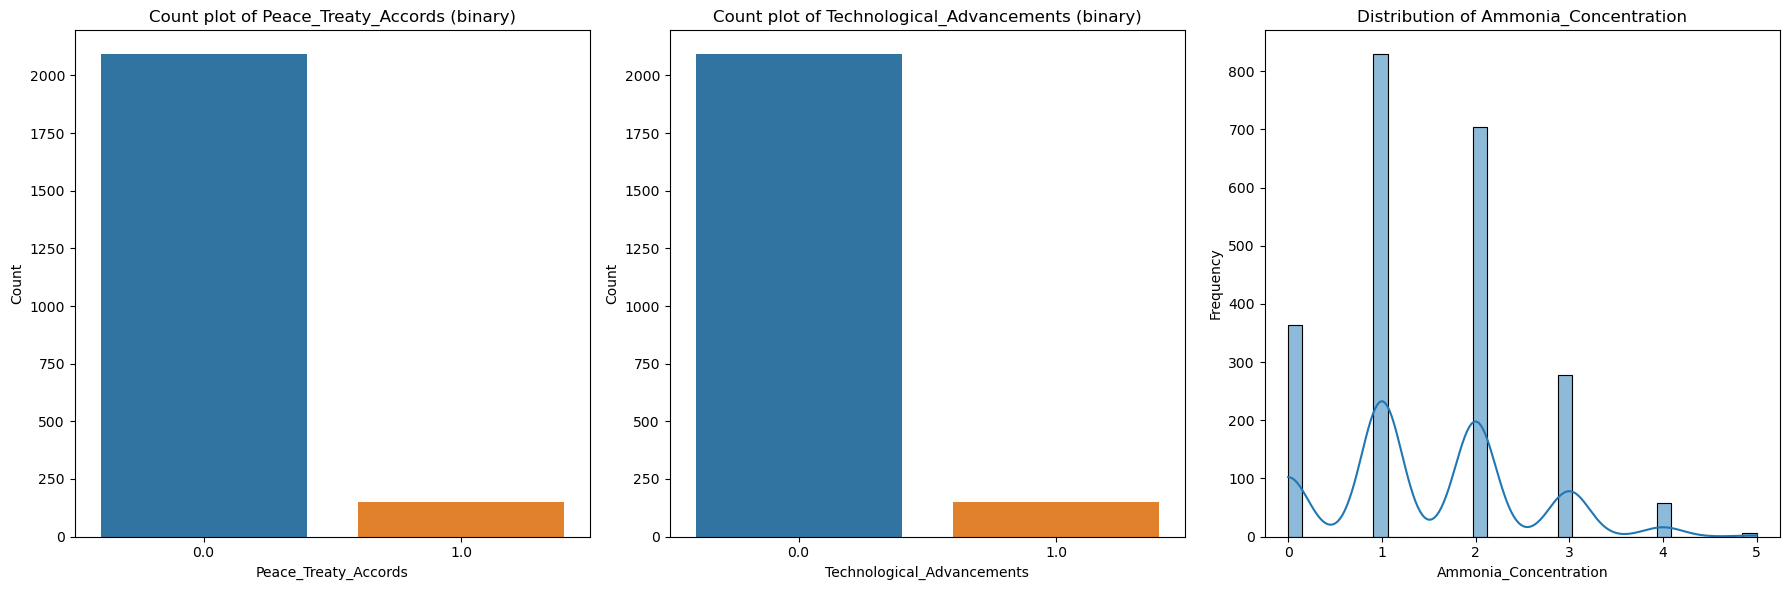

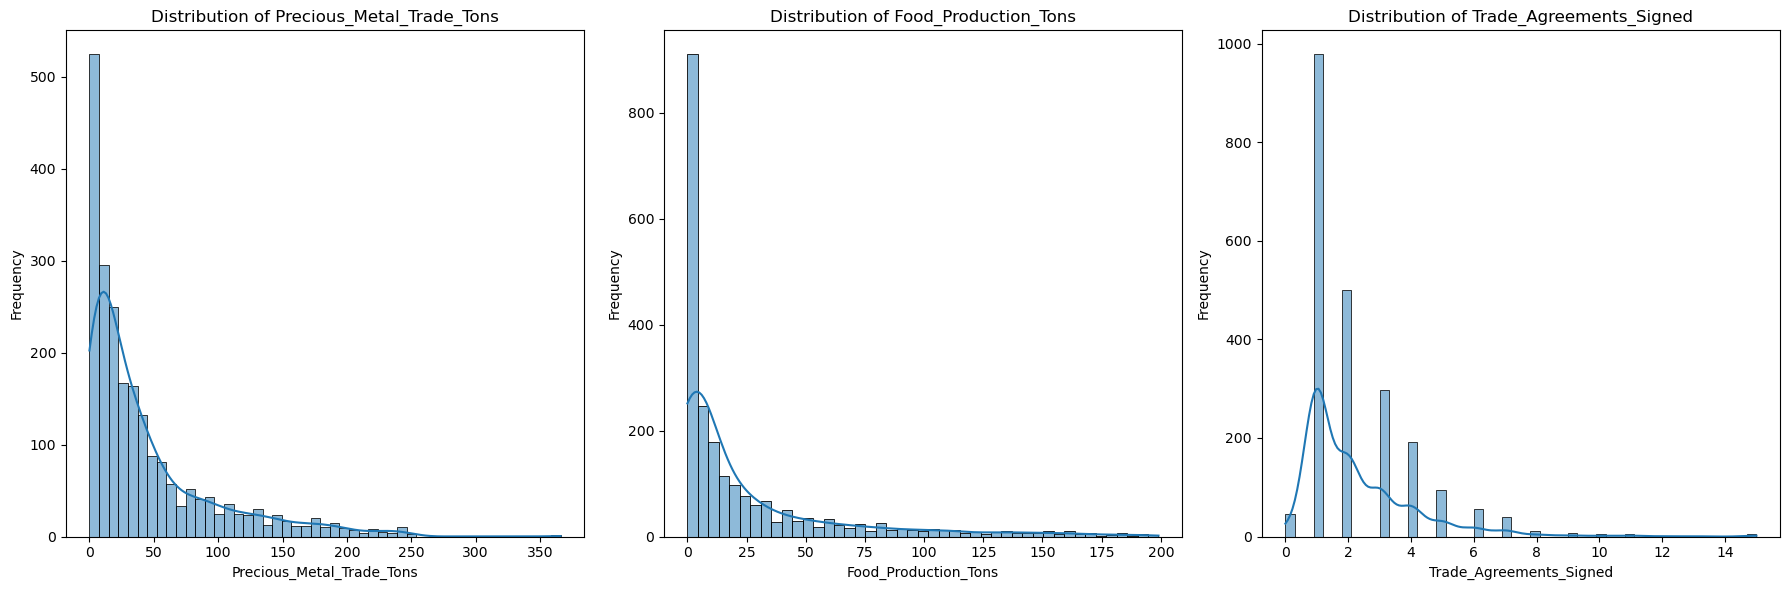

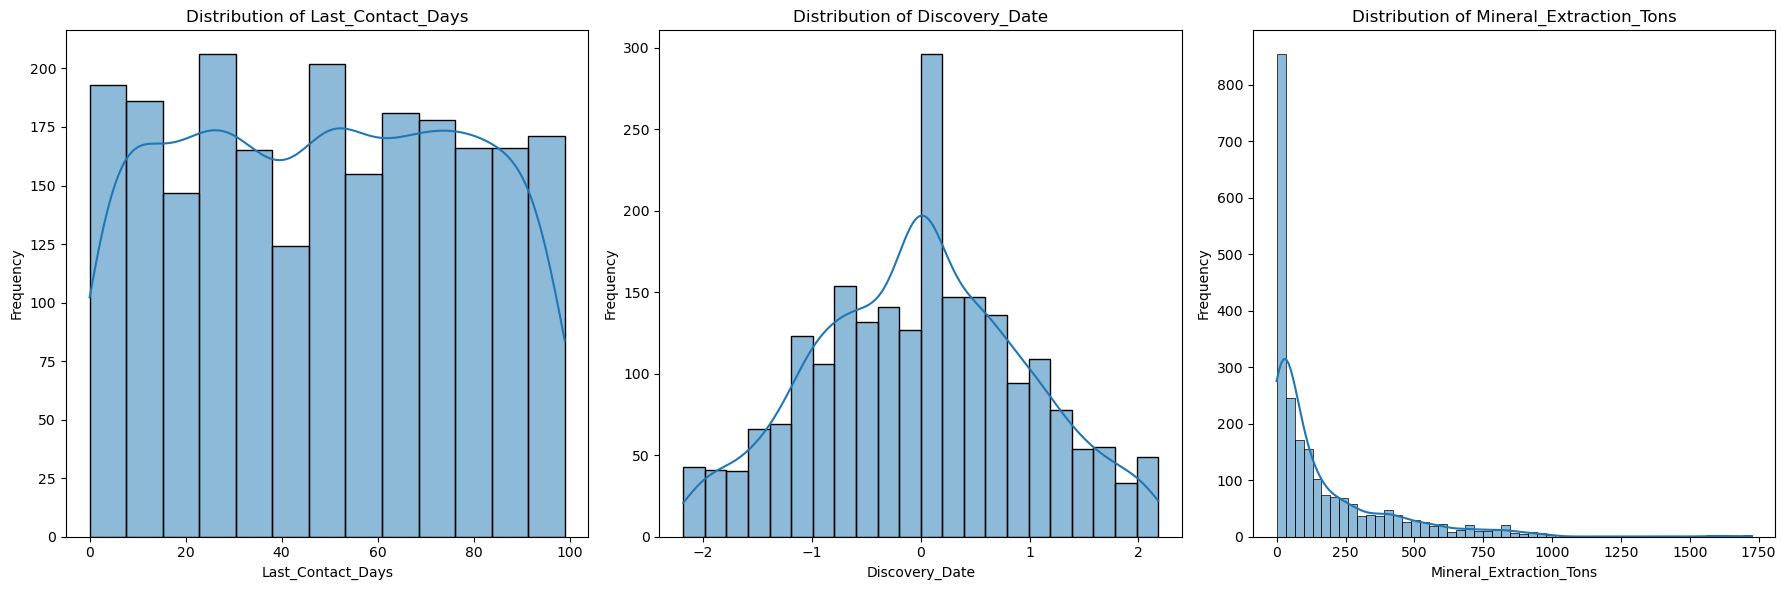

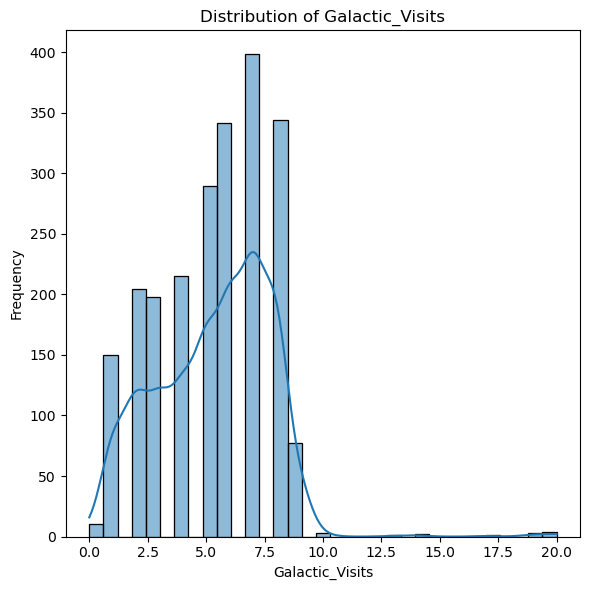

In [21]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 3
columns = ['Peace_Treaty_Accords', 'Technological_Advancements',
       'Ammonia_Concentration', 'Precious_Metal_Trade_Tons',
       'Food_Production_Tons', 'Trade_Agreements_Signed', 'Last_Contact_Days',
       'Discovery_Date', 'Mineral_Extraction_Tons', 'Galactic_Visits',
       ]
perform_graphical_analysis(plots_per_row, columns)

In [22]:
#Calculate the correlations after completing the values
correlation_df2 = high_correlations(df_in_progress)
combined_df = pd.concat([correlation_df, correlation_df2], axis=1)
combined_df

/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_39705/1124174870.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Variable 1,Variable 2,Correlation,Variable 1,Variable 2,Correlation
0,Mineral_Extraction_Tons,Exploration_Missions,0.723468,Mineral_Extraction_Tons,Exploration_Missions,0.660134
1,Resource_Mining_Operations,Liquid_Energy_Consumption_Terawatts,0.639129,Resource_Mining_Operations,Liquid_Energy_Consumption_Terawatts,0.639129
2,Exploration_Missions,Liquid_Energy_Consumption_Terawatts,0.615159,Exploration_Missions,Liquid_Energy_Consumption_Terawatts,0.615159
3,Food_Production_Tons,Biological_Research_Units,0.599803,Biological_Research_Units,Resource_Allocation_Credits,0.574609
4,Biological_Research_Units,Resource_Allocation_Credits,0.574609,Food_Production_Tons,Biological_Research_Units,0.570196
5,Food_Production_Tons,Resource_Allocation_Credits,0.569224,Exploration_Missions,Alien_Population_Count,0.564253
6,Mineral_Extraction_Tons,Biological_Research_Units,0.567399,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.562423
7,Exploration_Missions,Alien_Population_Count,0.564253,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.558047
8,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.562423,Food_Production_Tons,Resource_Allocation_Credits,0.538783
9,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.558047,Resource_Mining_Operations,Interplanetary_Communications,0.534687


We see that the correlations dropped (significantly), we could have avoided this by using KNN to complete our variables.

TO DO:
* Using KNN to complete the data?